x_train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples


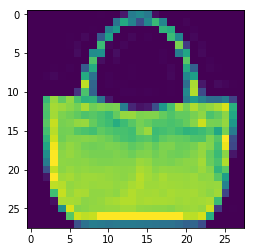

In [10]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
batch_size = 128
num_classes = 10
epochs = 5
train_images_path = keras.utils.get_file('train-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz')
train_labels_path = keras.utils.get_file('train-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz')
test_images_path = keras.utils.get_file('t10k-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz')
test_labels_path = keras.utils.get_file('t10k-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz')

def load_mnist(images_path, labels_path):
    import os
    import gzip
    import numpy as np

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

#if K.image_data_format() == 'channels_first':
 #   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  #  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   # input_shape = (1, img_rows, img_cols)

    

input_shape = (img_rows, img_cols, 1)
x_train, y_train = load_mnist(train_images_path, train_labels_path)
x_test, y_test = load_mnist(test_images_path, test_labels_path)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

plt.imshow(x_train[100, :].reshape((28, 28)))


In [2]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('my_mnist_keras_cnn_model.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 210s - loss: 0.6216 - acc: 0.7814 - val_loss: 0.4044 - val_acc: 0.8562
Epoch 2/5
60000/60000 [==============================] - 182s - loss: 0.3980 - acc: 0.8602 - val_loss: 0.3407 - val_acc: 0.8771
Epoch 3/5
60000/60000 [==============================] - 179s - loss: 0.3484 - acc: 0.8771 - val_loss: 0.3222 - val_acc: 0.8826
Epoch 4/5
60000/60000 [==============================] - 180s - loss: 0.3176 - acc: 0.8887 - val_loss: 0.2921 - val_acc: 0.8940
Epoch 5/5
60000/60000 [==============================] - 179s - loss: 0.2941 - acc: 0.8958 - val_loss: 0.2729 - val_acc: 0.9010
Test loss: 0.272928120637
Test accuracy: 0.901
